In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle

import warnings
warnings.filterwarnings("ignore")



# **MedEx: Medical Insurance Cost Prediction System**

# STEP 1 — Problem Statement

* This project develops a Machine Learning model to `predict annual medical insurance charges` based on demographic and lifestyle factors such as `age, BMI, sex, smoking status, children, and region`.  

* The task is treated as a **supervised regression problem**.  

* The workflow includes *data cleaning, exploratory analysis, log transformation of the target, feature engineering, and training multiple regression models*.  
* Models are evaluated using *MAE, MSE, RMSE, R², and Adjusted R²*, with Gradient Boosting Regressor performing the best.  


# STEP 2 : Data Collection

### LOAD DATA + BASIC CHECKS

In [2]:

#  Load the dataset 
df = pd.read_csv("C:/Users/Komal/Downloads/data_sci/Machine_Learning/MedEx2/data/medex_data.csv")   
print("Data Loaded !!")

Data Loaded !!


In [3]:
# NOTE: If there are seprate files this is how you can merge them !

# patients = pd.read_csv("patients.csv")
# hospitals = pd.read_csv("hospitals.csv")
# claims = pd.read_csv("medical_claims.csv")
# print("Files loaded successfully!\n")

# print("Merging datasets...\n")
# Merge claims with patients
# merged = claims.merge(patients, on="patient_id", how="left")

# Merge with hospital data
# merged = merged.merge(hospitals, on="hospital_id", how="left")

# print("Merging completed!\n")

## Basic Checks

In [4]:
#  Show first few rows 
print("FIRST 5 ROWS ")
print(df.head())

#  Shape of the dataset 
print("\nSHAPE (ROWS, COLUMNS) ")
print(df.shape)

#  Columns of the dataset
print("\nCOLUMNS")
print(df.columns)

#  Data types of each column 
print("\nCOLUMN DATA TYPES ")
print(df.dtypes)

#  Check missing values 
print("\nMISSING VALUES IN EACH COLUMN ")
print(df.isnull().sum())

#  Check number of unique values in each column 
print("\nUNIQUE VALUES IN EACH COLUMN ")
print(df.nunique())

#  Basic descriptive statistics for numeric columns 
print("\nDESCRIPTIVE STATISTICS - NUMERIC COLUMNS ")
print(df.describe())

#  Basic descriptive statistics for categorical columns 
print("\nDESCRIPTIVE STATISTICS - CATEGORICAL COLUMNS")
print(df.describe(include="O"))


#  Problem Definition
print("\nPROBLEM DEFINITION ")
print("Goal: Predict 'charges' (medical insurance cost).")
print("Type: Regression problem.")
print("Target Column: charges")
print("Feature Columns: age, sex, bmi, children, smoker, region")

FIRST 5 ROWS 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

SHAPE (ROWS, COLUMNS) 
(1338, 7)

COLUMNS
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

COLUMN DATA TYPES 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

MISSING VALUES IN EACH COLUMN 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

UNIQUE VALUES IN EACH COLUMN 
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtyp

## ANALYSIS (BEFORE CLEANING)

### UNIVARIATE ANALYSIS (BEFORE CLEANING)

In [5]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:",numeric_cols)
print("Categorical Columns:",categorical_cols)

sns.set(style="whitegrid")

Numeric Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


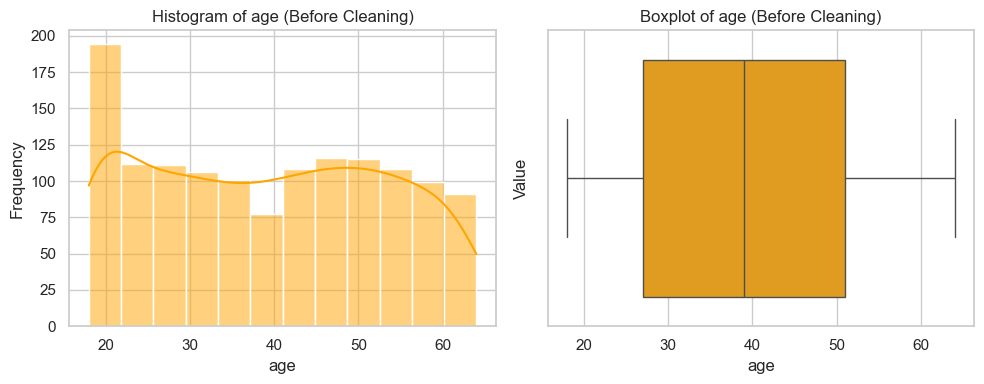

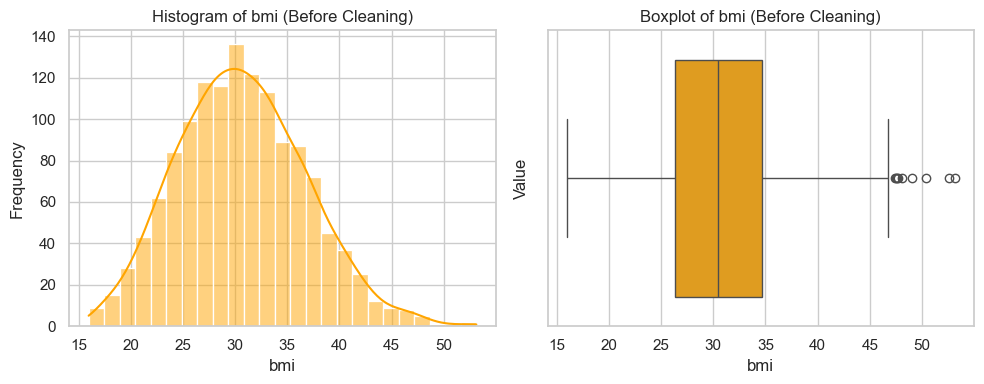

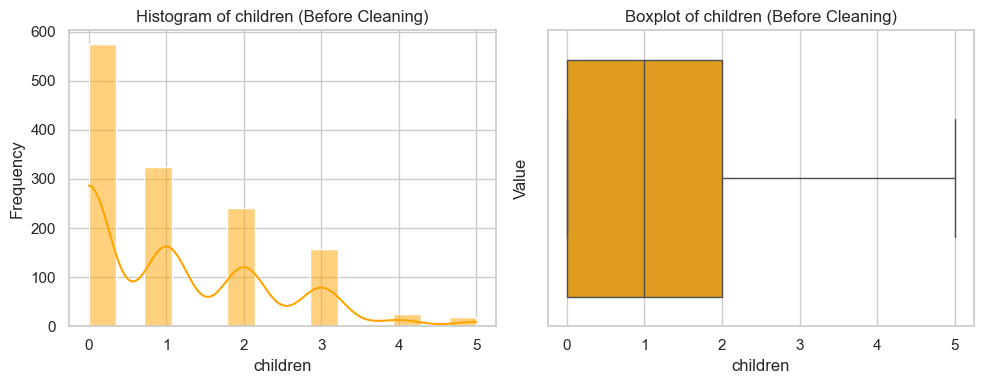

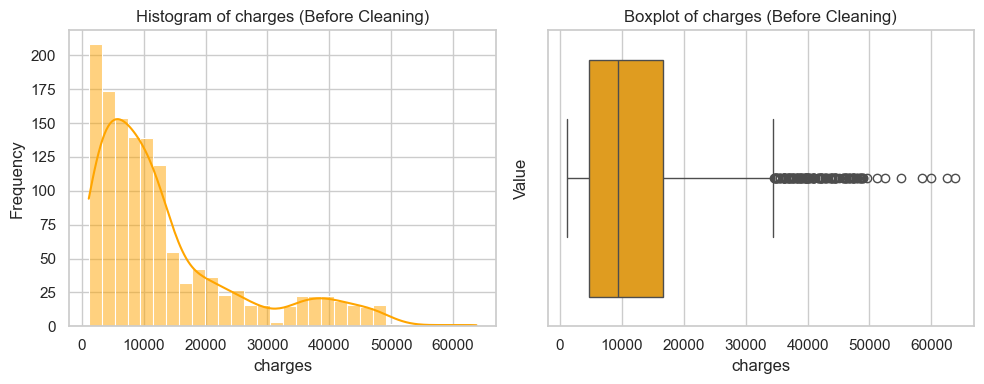

In [ ]:
# 1) Numeric plotting
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    #  Histogram 
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f"Histogram of {col} (Before Cleaning)")
    plt.xlabel(col)               # X label
    plt.ylabel("Frequency")       # Y label

    #  Boxplot 
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col} (Before Cleaning)")
    plt.xlabel(col)               # X label
    plt.ylabel("Value")           # Y label 

    plt.tight_layout()
    plt.show()

In [ ]:
# 2) Categorical plotting
cat_summary = {}

for col in categorical_cols:
    counts = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    summary_df = pd.DataFrame({"Count": counts, "Percentage %": perc.round(2)})
    cat_summary[col] = summary_df

for col, table in cat_summary.items():
    print(f"\n {col.upper()} ")
    display(table)


 SEX 


,Count,Percentage %
sex,,
male,676,50.52
female,662,49.48



 SMOKER 


,Count,Percentage %
smoker,,
no,1064,79.52
yes,274,20.48



 REGION 


,Count,Percentage %
region,,
southeast,364,27.20
southwest,325,24.29
northwest,325,24.29
northeast,324,24.22


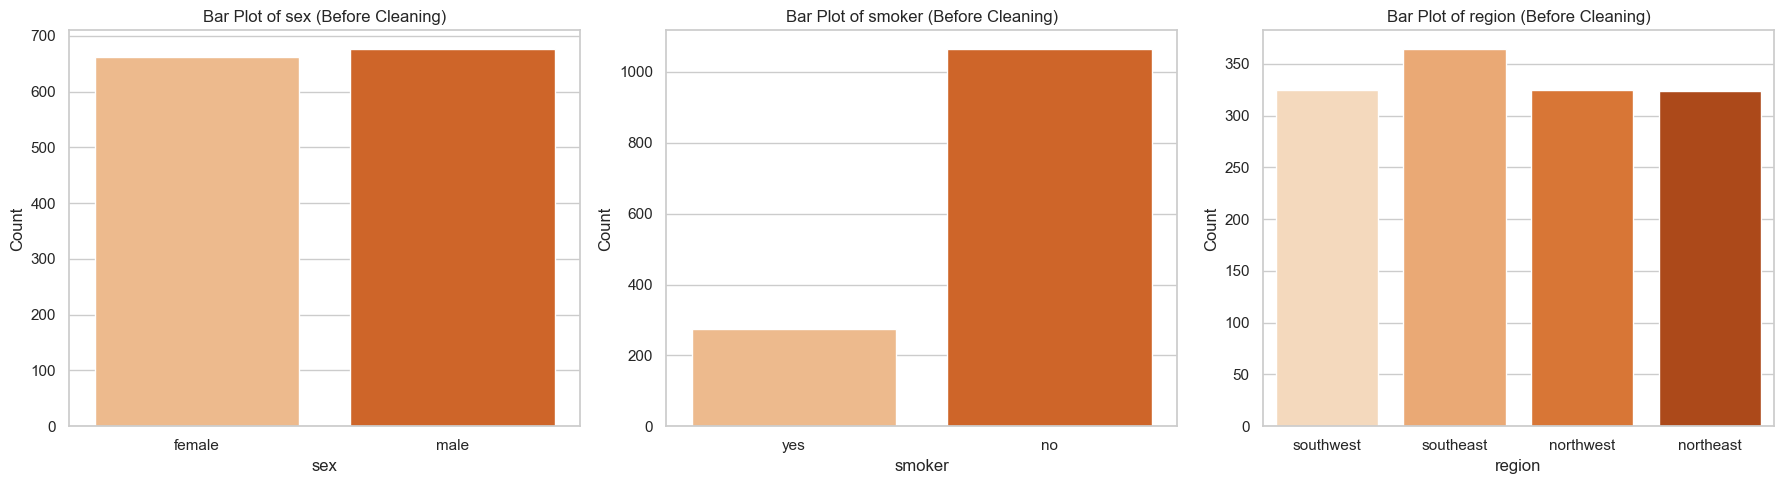

In [ ]:
# 3) Categorical plotting
n = len(categorical_cols)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=df[col], palette="Oranges")
    plt.title(f"Bar Plot of {col} (Before Cleaning)")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS (Before Cleaning)

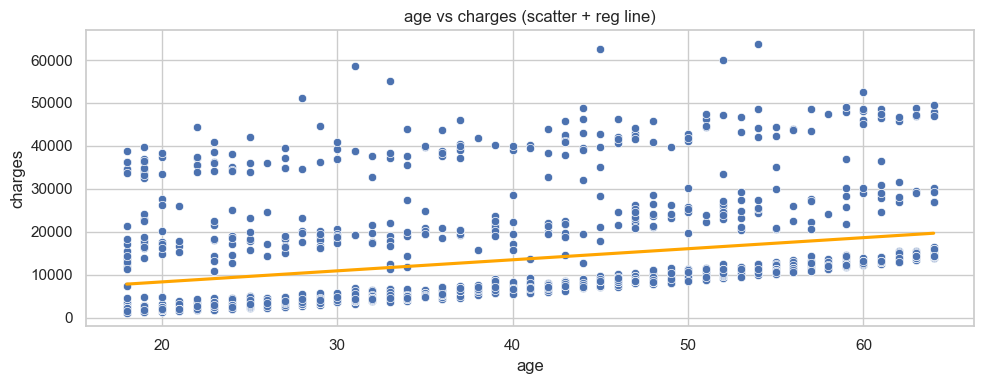

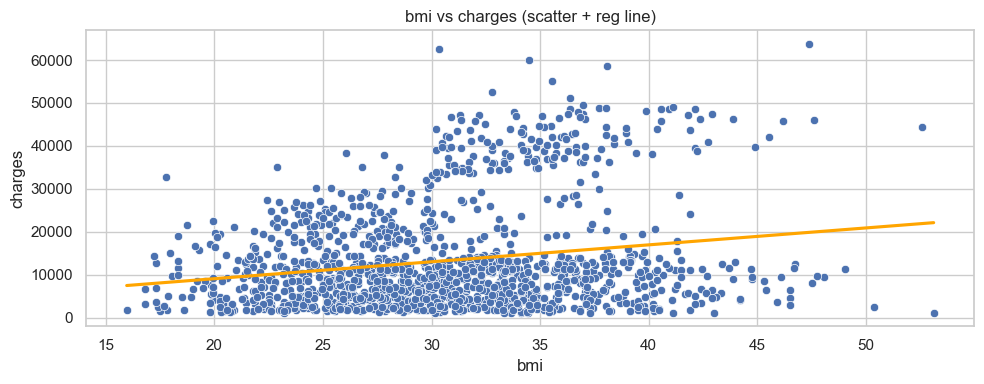

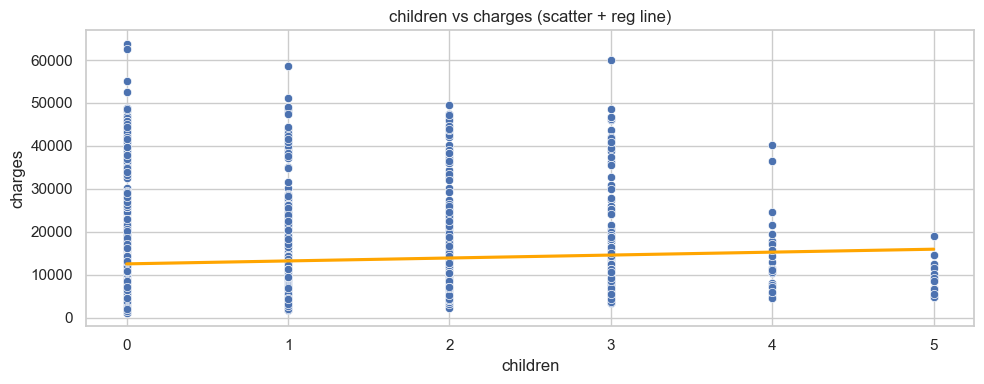

In [ ]:
# 1) NUMERIC vs TARGET (charges) 

# For each numeric feature (except target), showing a scatter plot vs charges with a regression line.
target = "charges"
features_num = [c for c in numeric_cols if c != target]

for col in features_num:
    plt.figure(figsize=(10,4))

    sns.scatterplot(x=df[col], y=df[target])
    sns.regplot(x=df[col], y=df[target], scatter=False, ci=None, line_kws={"color":"orange"})
    plt.title(f"{col} vs {target} (scatter + reg line)")
    plt.xlabel(col)
    plt.ylabel(target)

    plt.tight_layout()
    plt.show()

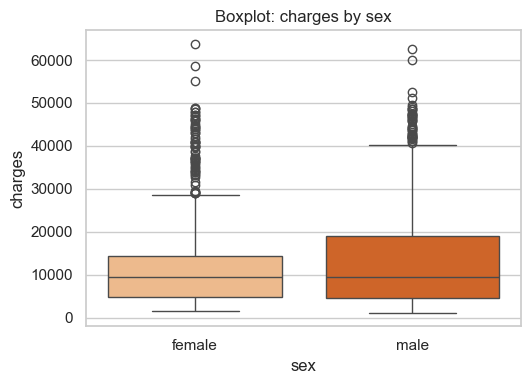

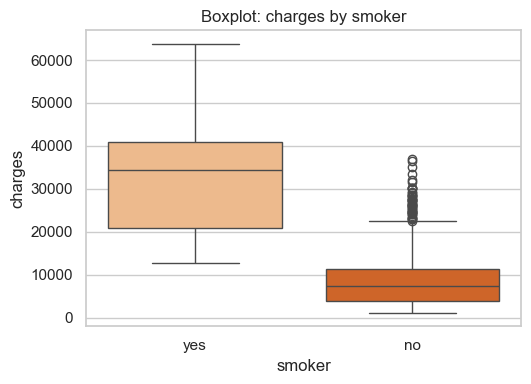

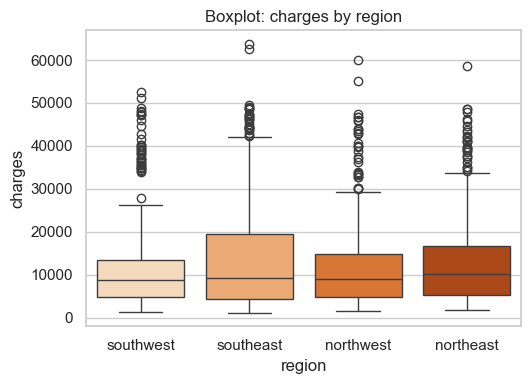

In [ ]:
# 2) CATEGORICAL vs TARGET (charges)

for col in categorical_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], y=df[target], palette="Oranges")
    plt.title(f"Boxplot: {target} by {col}")
    plt.xlabel(col)
    plt.ylabel(target)

    plt.tight_layout()
    plt.show()

Numeric correlation matrix:


,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000



Absolute correlations with target (charges):


age         0.299
bmi         0.198
children    0.068
Name: charges, dtype: float64

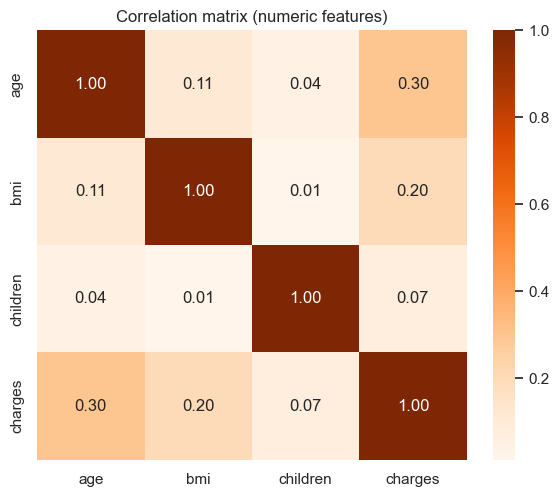

In [ ]:
# 3) CORRELATION MATRIX (numeric columns)

corr = df[numeric_cols].corr()
print("Numeric correlation matrix:")
display(corr.round(3))

# Print strongest correlations with target
corr_with_target = corr[target].drop(labels=[target]).abs().sort_values(ascending=False)
print("\nAbsolute correlations with target (charges):")
display(corr_with_target.round(3))

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Oranges", square=True)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()



In [ ]:
# 4) MEAN CHARGES BY CATEGORIES 

print("\nMean charges by categorical values:\n")

for col in categorical_cols:
    mean_table = (df.groupby(col)[target].mean().round(2).sort_values(ascending=False).reset_index())    
    print(f" {col.upper()} ")
    display(mean_table)     



Mean charges by categorical values:

 SEX 


,sex,charges
0,male,13956.75
1,female,12569.58


 SMOKER 


,smoker,charges
0,yes,32050.23
1,no,8434.27


 REGION 


,region,charges
0,southeast,14735.41
1,northeast,13406.38
2,northwest,12417.58
3,southwest,12346.94


# STEP 3: Data Cleaning

In [13]:
print("Initial shape:", df.shape)
print("\nInitial dtypes:\n", df.dtypes)
print("\nInitial missing values:\n", df.isnull().sum())

Initial shape: (1338, 7)

Initial dtypes:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Initial missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [14]:
# 1) REMOVE DUPLICATES

dups = df.duplicated().sum()
print(f"\nDuplicates found: {dups}")
if dups > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)


Duplicates found: 1
Duplicates removed. New shape: (1337, 7)


In [ ]:
# 2) FIX DATA TYPES & STANDARDIZE STRING FORMATTING

# Ensure numeric columns are correct types
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['children'] = pd.to_numeric(df['children'], errors='coerce').astype('Int64')
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Standardize string columns: strip whitespace and lowercase
for c in ['sex', 'smoker', 'region']:
    df[c] = df[c].astype(str).str.strip().str.lower()

# Quick look at unique values 
print("\nUnique values after lowercase/strip:")
for c in ['sex','smoker','region']:
    print(f" {c}: {df[c].unique()}")


Unique values after lowercase/strip:
 sex: ['female' 'male']
 smoker: ['yes' 'no']
 region: ['southwest' 'southeast' 'northwest' 'northeast']


In [16]:
# 3) CORRECT (SANE) VALUES 

# Validity checks for numeric features (age, bmi, children, smoker, sex).
# Even though no invalid values are present in this dataset, this step is included
# to illustrate how to identify and handle unrealistic values in real-world datasets.


# Age: dataset expected 18-100. If outside range, set to NaN for imputation.
df.loc[(df['age'] < 0) | (df['age'] > 120), 'age'] = pd.NA

# BMI: negative or extremely small values are invalid -> set to NaN
df.loc[(df['bmi'] <= 0) | (df['bmi'] > 100), 'bmi'] = np.nan

# Children: negative values are invalid -> set to NaN
df.loc[df['children'] < 0, 'children'] = pd.NA

# Standardize smoker column to only 'yes' or 'no' if possible
# e.g., convert "y", "yes ", "No", "n" types
df['smoker'] = df['smoker'].replace({
    'y': 'yes', 'ye': 'yes', 'yes ': 'yes', 'n': 'no', 'no ': 'no'
})

# Standardize sex values (male/female)
df['sex'] = df['sex'].replace({
    'm': 'male', 'f': 'female', 'female ': 'female', 'male ': 'male'
})

print("\nAfter correction, example rows:")
print(df.head())



After correction, example rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [17]:
# 4) HANDLE MISSING VALUES

# Note: There are no missing values in this dataset. However, missing-value
# imputation is demonstrated here as part of a complete data-cleaning workflow.
# Numeric columns would be filled with their median, while categorical columns would be filled with their mode.

# Recompute missing count
print("\nMissing values BEFORE imputation:")
print(df.isnull().sum())

# Numeric: fill with median (age, bmi, children)
# Categorical: fill with mode (most common)
num_cols = ['age', 'bmi', 'children', 'charges']
cat_cols = ['sex', 'smoker', 'region']

# For numeric columns (except charges), fill median
for c in ['age', 'bmi', 'children']:
    if df[c].isnull().sum() > 0:
        med = df[c].median()
        df[c] = df[c].fillna(med)
        print(f"Filled missing numeric {c} with median: {med}")

# For categorical columns, fill with mode
for c in cat_cols:
    if df[c].isnull().sum() > 0:
        mode = df[c].mode(dropna=True)
        if not mode.empty:
            df[c] = df[c].fillna(mode[0])
            print(f"Filled missing categorical {c} with mode: {mode[0]}")

print("\nMissing values AFTER imputation:")
print(df.isnull().sum())


Missing values BEFORE imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values AFTER imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
# NUMERICAL OUTLIER CHECK USING IQR METHOD

# IQR (Interquartile Range) method is used to detect outliers based on the 
# spread of the middle 50% of the data. Any value outside the range:
# [Q1 - 1.5*IQR,  Q3 + 1.5*IQR] is treated as a potential outlier.

# Even though this dataset is mostly clean, implementing IQR detection helps
# demonstrate a complete outlier analysis workflow. It allows us to identify
# which columns contain extreme values (e.g., charges, BMI).


In [19]:
# NUMERICAL OUTLIER CHECK USING IQR METHOD

def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Boolean mask of outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\n {col.upper()}")
    print(f"Lower Bound: {lower:.2f}")
    print(f"Upper Bound: {upper:.2f}")
    print(f"Outlier Count: {outliers.shape[0]}")
    print(f"Min Value: {df[col].min()} | Max Value: {df[col].max()}")


for col in numeric_cols:
    detect_outliers(col)



 AGE
Lower Bound: -9.00
Upper Bound: 87.00
Outlier Count: 0
Min Value: 18 | Max Value: 64

 BMI
Lower Bound: 13.67
Upper Bound: 47.32
Outlier Count: 9
Min Value: 15.96 | Max Value: 53.13

 CHILDREN
Lower Bound: -3.00
Upper Bound: 5.00
Outlier Count: 0
Min Value: 0 | Max Value: 5

 CHARGES
Lower Bound: -13120.72
Upper Bound: 34524.78
Outlier Count: 139
Min Value: 1121.8739 | Max Value: 63770.42801


In [20]:
# Z-SCORE OUTLIER DETECTION

# Z-score measures how many standard deviations a data point is away 
# from the mean. Any value with |z| > 3 is usually flagged as an outlier.

# This method is included to show how different statistical techniques 
# can produce different outlier counts. Z-score is sensitive to data 
# distribution and extreme values, whereas IQR works better for skewed data.

# Showing both IQR and Z-score helps compare results and understand the 
# impact of distribution shape on outlier detection.


In [21]:
# Z-Score Outlier Detection

for col in numeric_cols:
    z = np.abs(stats.zscore(df[col]))
    outliers = df[z > 3]

    print(f"\n Z-SCORE OUTLIERS IN {col.upper()}")
    print("Outlier Count:", outliers.shape[0])



 Z-SCORE OUTLIERS IN AGE
Outlier Count: 0

 Z-SCORE OUTLIERS IN BMI
Outlier Count: 4

 Z-SCORE OUTLIERS IN CHILDREN
Outlier Count: 18

 Z-SCORE OUTLIERS IN CHARGES
Outlier Count: 7


In [22]:
# NOTE ON DIFFERENT RESULTS:

# IQR and Z-score often detect a different number of outliers because:
# - IQR does not depend on the mean or standard deviation; it is robust 
#   for skewed or non-normal data.
# - Z-score assumes the data is normally distributed, so it may miss 
#   or over-flag outliers if the distribution is skewed.

# In this dataset:
# - IQR flagged more outliers in 'charges' because this column is skewed.
# - Z-score flagged fewer outliers because mean/stdev-based detection is less sensitive for skewed distributions.

# Demonstrating both makes the outlier analysis more complete and professional.


In [23]:
# 5) OUTLIER HANDLING (IQR CAPPING / Winsorization)
# We will: cap BMI and charges; age and children have no strong outliers

def cap_iqr(series):
    """Return series with values capped at IQR bounds."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Inspect before capping (optional prints)
print("\nNumeric summary BEFORE outlier capping:")
print(df[['age','bmi','children','charges']].describe().T[['min','25%','50%','75%','max']])

# Cap BMI (we saw a few high-BMI outliers)
df['bmi'] = cap_iqr(df['bmi'])

# Cap charges (we will cap rather than remove; we'll also create log_charges)
df['charges'] = cap_iqr(df['charges'])

print("\nNumeric summary AFTER outlier capping:")
print(df[['age','bmi','children','charges']].describe().T[['min','25%','50%','75%','max']])


Numeric summary BEFORE outlier capping:
                min       25%        50%          75%          max
age            18.0      27.0       39.0         51.0         64.0
bmi           15.96     26.29       30.4         34.7        53.13
children        0.0       0.0        1.0          2.0          5.0
charges   1121.8739  4746.344  9386.1613  16657.71745  63770.42801

Numeric summary AFTER outlier capping:
                min       25%        50%          75%           max
age            18.0      27.0       39.0         51.0          64.0
bmi           15.96     26.29       30.4         34.7        47.315
children        0.0       0.0        1.0          2.0           5.0
charges   1121.8739  4746.344  9386.1613  16657.71745  34524.777625


In [24]:
# The 'charges' variable is moderately right-skewed (skew = 1.085), which can
# negatively affect regression performance. To stabilize variance and make the 
# distribution more symmetric, we apply a log transformation and store the result 
# in a new column 'log_charges'. After transformation, skewness improves to -0.223, 
# indicating a nearly normal distribution.

In [25]:
# 6) TRANSFORM TARGET: LOG of charges (helps heavy skew)

# Keep both original (charges) and new column log_charges
# Avoid log(0) — charges should be > 0, but guard anyway

df['log_charges'] = np.log(df['charges'].replace(0, np.nan)).fillna(0)

# Check skewness before & after (optional)
print("\nSkewness (charges):", df['charges'].skew().round(3))
print("Skewness (log_charges):", df['log_charges'].skew().round(3))


Skewness (charges): 1.085
Skewness (log_charges): -0.223


In [26]:
# 7) CLEAN CATEGORICAL VALUES (final check)

print("\nValue counts for categorical columns (final):\n")
for c in cat_cols:
    print(df[c].value_counts(),"\n")


Value counts for categorical columns (final):

sex
male      675
female    662
Name: count, dtype: int64 

smoker
no     1063
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64 



In [27]:
# 8) ENCODE CATEGORICALS (simple options)

# Map binary columns for simpler models
df['smoker'] = df['smoker'].map({'no':0, 'yes':1}).astype('int64')
df['sex'] = df['sex'].map({'female':0, 'male':1}).astype('int64')

# One-hot encode region (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)



In [28]:
# 9) Reorder columns so target last (neat)

cols = [c for c in df_encoded.columns if c != 'log_charges'] + ['log_charges']
df_encoded = df_encoded[cols]
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,log_charges
0,19,0,27.900,0,1,16884.92400,False,False,True,9.734176
1,18,1,33.770,1,0,1725.55230,False,True,False,7.453302
2,28,1,33.000,3,0,4449.46200,False,True,False,8.400538
3,33,1,22.705,0,0,21984.47061,True,False,False,9.998092
4,32,1,28.880,0,0,3866.85520,True,False,False,8.260197


In [29]:
# 10) FINAL CHECKS AND SAVE

print("\nFinal cleaned shape:", df_encoded.shape)
print("\nFinal dtypes:\n", df_encoded.dtypes)
print("\nSample rows:\n", df_encoded.head())

# Save cleaned version
df_encoded.to_csv("cleaned_medex_data.csv", index=False)
print("\nSaved cleaned dataset to cleaned_medex_data.csv")


Final cleaned shape: (1337, 10)

Final dtypes:
 age                   Int64
sex                   int64
bmi                 float64
children              Int64
smoker                int64
charges             float64
region_northwest       bool
region_southeast       bool
region_southwest       bool
log_charges         float64
dtype: object

Sample rows:
    age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  log_charges  
0             False              True     9.734176  
1              True             False     7.453302  
2              True             False     8.400538

# STEP 4: Exploratory Data Analysis (EDA)

In [ ]:
df_encoded = pd.read_csv("C:/Users/Komal/Downloads/data_sci/Machine_Learning/MedEx2/code/cleaned_medex_data.csv")   
df = df_encoded.copy()  
display(df.head())

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,log_charges
0,19,0,27.900,0,1,16884.92400,False,False,True,9.734176
1,18,1,33.770,1,0,1725.55230,False,True,False,7.453302
2,28,1,33.000,3,0,4449.46200,False,True,False,8.400538
3,33,1,22.705,0,0,21984.47061,True,False,False,9.998092
4,32,1,28.880,0,0,3866.85520,True,False,False,8.260197


In [31]:
# 0) Quick info & summary
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nNumeric summary (describe):")
display(df.describe().T)

Shape: (1337, 10)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest', 'log_charges']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
 9   log_charges       1337 non-null   float64
dtypes: bool(3), float64(3), int64(4)
memory usage: 77.2 KB
None

Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.000000,27.00000,39.000000,51.000000,64.000000
sex,1337.0,0.504862,0.500163,0.000000,0.00000,1.000000,1.000000,1.000000
bmi,1337.0,30.650247,6.059655,15.960000,26.29000,30.400000,34.700000,47.315000
children,1337.0,1.095737,1.205571,0.000000,0.00000,1.000000,2.000000,5.000000
smoker,1337.0,0.204936,0.403806,0.000000,0.00000,0.000000,0.000000,1.000000
charges,1337.0,12491.159952,10165.511950,1121.873900,4746.34400,9386.161300,16657.717450,34524.777625
log_charges,1337.0,9.080135,0.885865,7.022756,8.46513,9.146992,9.720629,10.449433


In [32]:
# 1) Skewness check for charges and log_charges
if 'charges' in df.columns:
    print("\nSkewness charges:", round(df['charges'].skew(), 3))
if 'log_charges' in df.columns:
    print("Skewness log_charges:", round(df['log_charges'].skew(), 3))


Skewness charges: 1.085
Skewness log_charges: -0.223


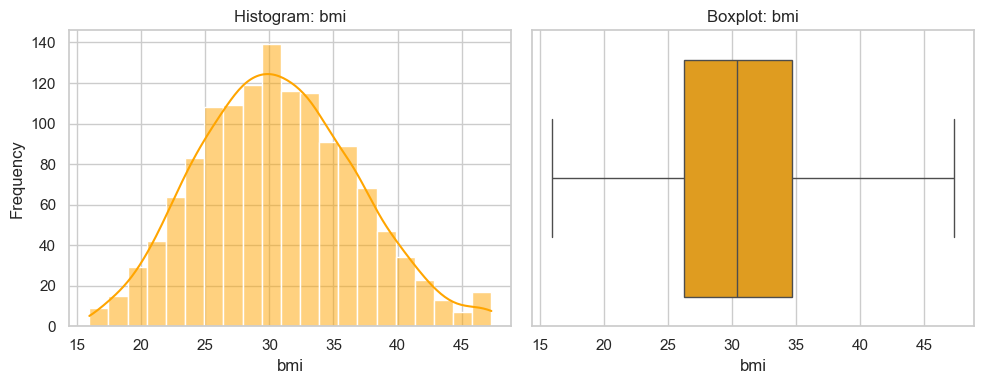

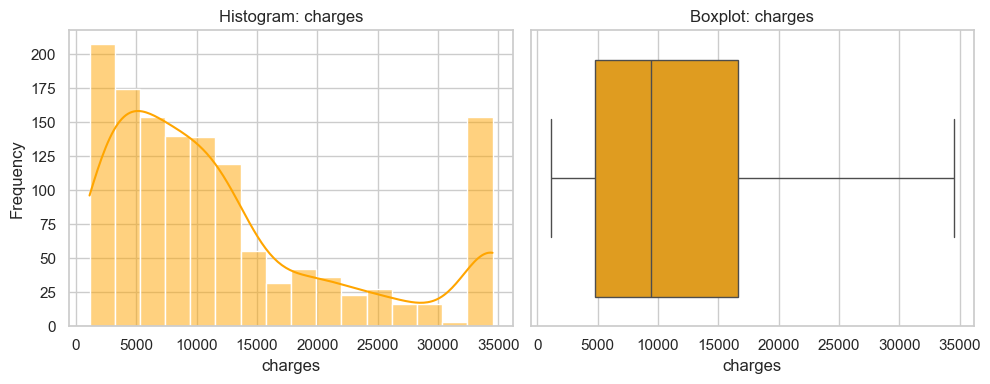

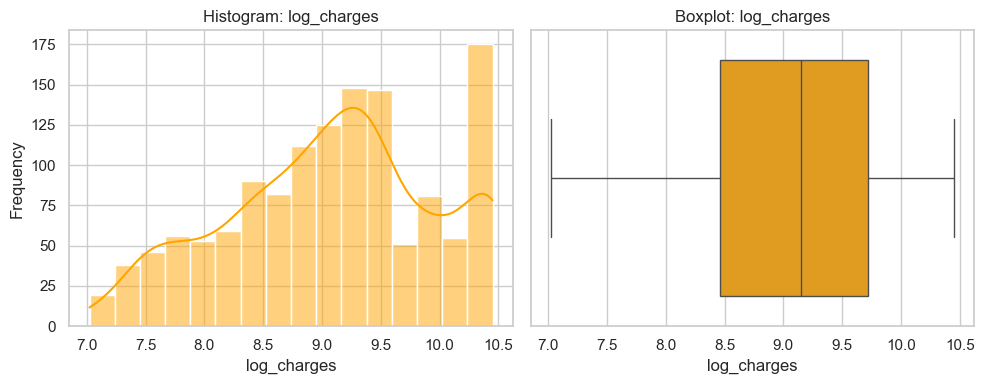

In [33]:
# 2) Mini Univariate plots

numeric_to_check = ['bmi', 'charges', 'log_charges']
for col in numeric_to_check:
    if col in df.columns:
        plt.figure(figsize=(10,4))
        # histogram on left
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True, color='orange')
        plt.title(f"Histogram: {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        # boxplot on right
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col], color='orange')
        plt.title(f"Boxplot: {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


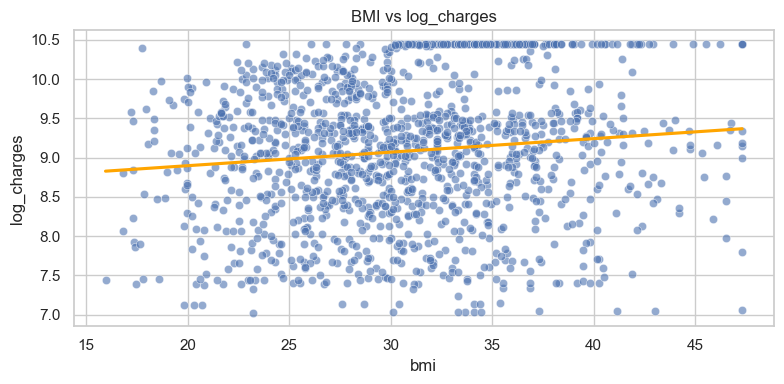

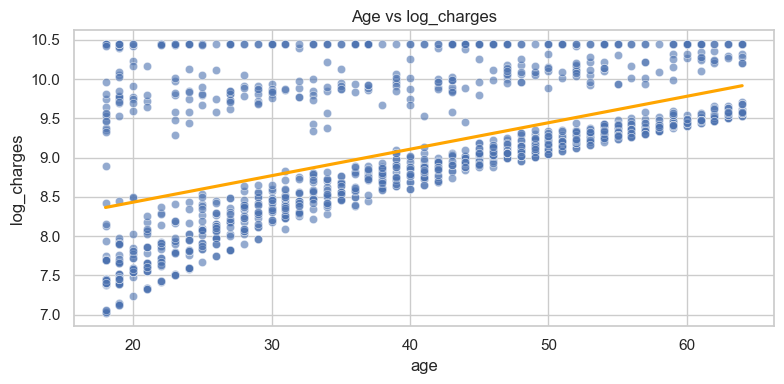

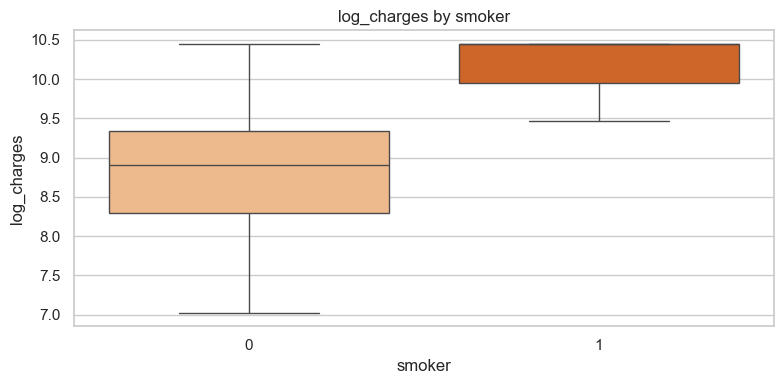

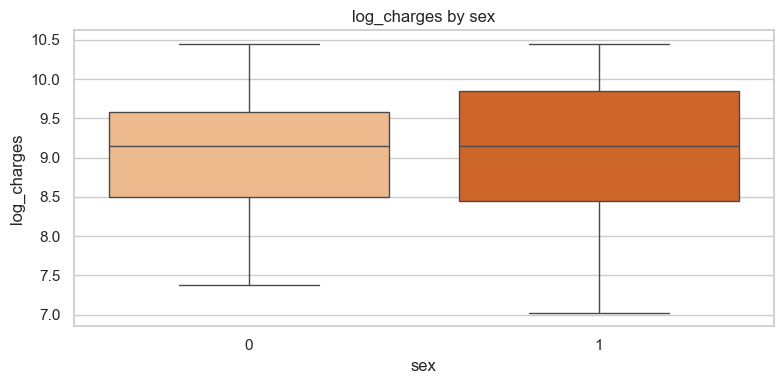

In [34]:
# 3) Mini Bivariate plots (vs log_charges)

target = 'log_charges' if 'log_charges' in df.columns else 'charges'

# Scatter: bmi vs target
if 'bmi' in df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df['bmi'], y=df[target], alpha=0.6)
    sns.regplot(x=df['bmi'], y=df[target], scatter=False, ci=None, line_kws={"color":"orange"})
    plt.title(f"BMI vs {target}")
    plt.xlabel("bmi")
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

# Scatter: age vs target
if 'age' in df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df['age'], y=df[target], alpha=0.6)
    sns.regplot(x=df['age'], y=df[target], scatter=False, ci=None, line_kws={"color":"orange"})
    plt.title(f"Age vs {target}")
    plt.xlabel("age")
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

# Boxplots: categorical vs target (smoker, sex)
for cat in ['smoker', 'sex']:
    if cat in df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[cat], y=df[target], palette="Oranges")
        plt.title(f"{target} by {cat}")
        plt.xlabel(cat)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

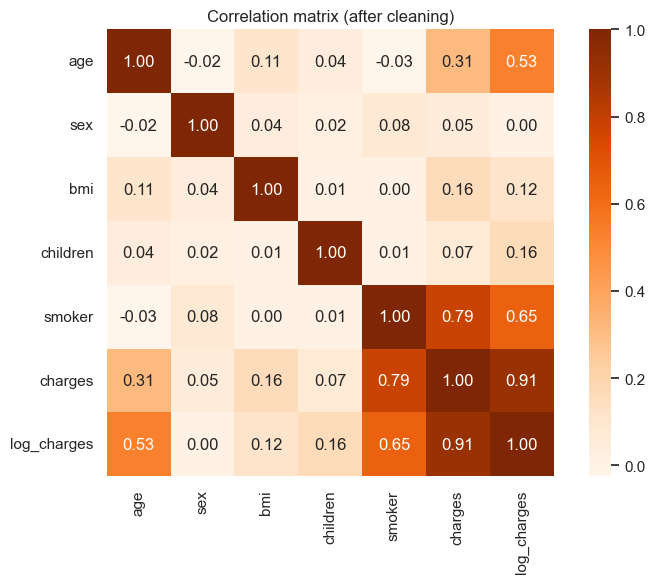

In [ ]:
# 4) Correlation heatmap 

# Choose numeric columns for correlation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if target in num_cols:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="Oranges", square=True)
    plt.title("Correlation matrix (after cleaning)")
    plt.tight_layout()
    plt.show()
else:
    print("\nNote: target not numeric, skipping heatmap.")

In [ ]:
# 5) Small group stats (mean log_charges by smoker & region)

if 'smoker' in df.columns:
    print("\nMean (target) by smoker:")
    display(df.groupby('smoker')[target].mean().round(3))

region_cols = [c for c in df.columns if c.startswith("region_")]  # one-hot style
if region_cols:
    print("\nMean (target) by region (one-hot columns):")
    display(df[region_cols + [target]].groupby(region_cols).mean())




Mean (target) by smoker:


smoker
0     8.789
1    10.208
Name: log_charges, dtype: float64


Mean (target) by region (one-hot columns):


log_charges
region_northwest region_southeast region_southwest             
False            False            False                9.153190
                                  True                 9.014423
                 True             False                9.091021
True             False            False                9.060766

# STEP 5: FEATURE ENGINEERING

In [37]:
# 1) SELECT FEATURES (X) AND TARGET (y)
features = ['age', 'sex', 'bmi', 'children', 'smoker',
            'region_northwest', 'region_southeast', 'region_southwest']

X = df[features]
y = df['log_charges']   # use log_charges for modeling

In [38]:
# 2) FEATURE SCALING (Standardization)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=features)

print("Feature Engineering Complete!")
print("\nScaled Feature Sample:")
display(X_scaled.head())

print("\nTarget Sample (log_charges):")
display(y.head())

Feature Engineering Complete!

Scaled Feature Sample:


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,-1.440418,-1.009771,-0.454032,-0.909234,1.969660,-0.565546,-0.611638,1.764609
1,-1.511647,0.990324,0.515033,-0.079442,-0.507702,-0.565546,1.634955,-0.566698
2,-0.799350,0.990324,0.387915,1.580143,-0.507702,-0.565546,1.634955,-0.566698
3,-0.443201,0.990324,-1.311662,-0.909234,-0.507702,1.768203,-0.611638,-0.566698
4,-0.514431,0.990324,-0.292246,-0.909234,-0.507702,1.768203,-0.611638,-0.566698



Target Sample (log_charges):


0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: log_charges, dtype: float64

# STEP 6: TRAIN–TEST SPLIT

In [39]:
# test_size = 0.2  → 20% test data, 80% training data
# random_state = 42 → ensures same split every time

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

# Print shapes for verification
print("Training set shape:", X_train.shape)
print("Testing set shape :", X_test.shape)
print("Training target   :", y_train.shape)
print("Testing target    :", y_test.shape)

print("\nTrain Test Split done successfully!")

Training set shape: (1069, 8)
Testing set shape : (268, 8)
Training target   : (1069,)
Testing target    : (268,)

Train Test Split done successfully!


# STEP 7 : MODEL BUILDING (ALL MODELS)

In [ ]:
# 1) Define models 

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [41]:
# XGBoost (install if missing)
try:
    from xgboost import XGBRegressor
except:
    !pip install xgboost
    from xgboost import XGBRegressor

In [42]:
# FUNCTION: REGRESSION METRICS (MAE, MSE, RMSE, R2, Adjusted R2)

def evaluate_model(y_test, y_pred, X_test):
    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)

    # Adjusted R²
    n = X_test.shape[0]  # samples
    k = X_test.shape[1]  # features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    return mae, mse, rmse, r2, adj_r2

In [ ]:
# 1) DEFINE MODELS 

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
}


In [44]:
# 2) TRAIN → PREDICT → EVALUATE

results = []

for name, model in models.items():
    print(f"\nTraining Model: {name}")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mae, mse, rmse, r2, adj_r2 = evaluate_model(y_test, y_pred, X_test)
    
    # Save to results table
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "Adjusted_R2": adj_r2
    })

    # Print metrics
    print(f"MAE         : {mae:.4f}")
    print(f"MSE         : {mse:.4f}")
    print(f"RMSE        : {rmse:.4f}")
    print(f"R² Score    : {r2:.4f}")
    print(f"Adjusted R² : {adj_r2:.4f}")




Training Model: LinearRegression
MAE         : 0.2633
MSE         : 0.1603
RMSE        : 0.4004
R² Score    : 0.8090
Adjusted R² : 0.8031

Training Model: Ridge
MAE         : 0.2634
MSE         : 0.1603
RMSE        : 0.4004
R² Score    : 0.8090
Adjusted R² : 0.8031

Training Model: Lasso
MAE         : 0.7480
MSE         : 0.8401
RMSE        : 0.9166
R² Score    : -0.0010
Adjusted R² : -0.0319

Training Model: ElasticNet
MAE         : 0.7296
MSE         : 0.7948
RMSE        : 0.8915
R² Score    : 0.0530
Adjusted R² : 0.0238

Training Model: DecisionTree
MAE         : 0.2271
MSE         : 0.2793
RMSE        : 0.5285
R² Score    : 0.6672
Adjusted R² : 0.6569

Training Model: RandomForest
MAE         : 0.1961
MSE         : 0.1475
RMSE        : 0.3840
R² Score    : 0.8243
Adjusted R² : 0.8189

Training Model: GradientBoosting
MAE         : 0.1879
MSE         : 0.1116
RMSE        : 0.3340
R² Score    : 0.8671
Adjusted R² : 0.8630

Training Model: XGBoost
MAE         : 0.1955
MSE         : 0

In [45]:
# 3) SUMMARY TABLE — SORTED BY RMSE

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)

print("MODEL PERFORMANCE SUMMARY (Sorted by RMSE):")
display(results_df)


MODEL PERFORMANCE SUMMARY (Sorted by RMSE):


,Model,MAE,MSE,RMSE,R2,Adjusted_R2
0,GradientBoosting,0.187948,0.111566,0.334016,0.867068,0.862962
1,XGBoost,0.195527,0.119458,0.345627,0.857665,0.853269
2,RandomForest,0.196093,0.147477,0.384027,0.824281,0.818853
3,LinearRegression,0.263272,0.160281,0.400351,0.809024,0.803126
4,Ridge,0.263421,0.160340,0.400424,0.808954,0.803053
5,DecisionTree,0.227145,0.279320,0.528507,0.667189,0.656909
6,ElasticNet,0.729640,0.794769,0.891498,0.053029,0.023779
7,Lasso,0.747971,0.840099,0.916569,-0.000983,-0.031901


## SIMPLE PLOTS FOR ALL MODELS


Plotting: LinearRegression


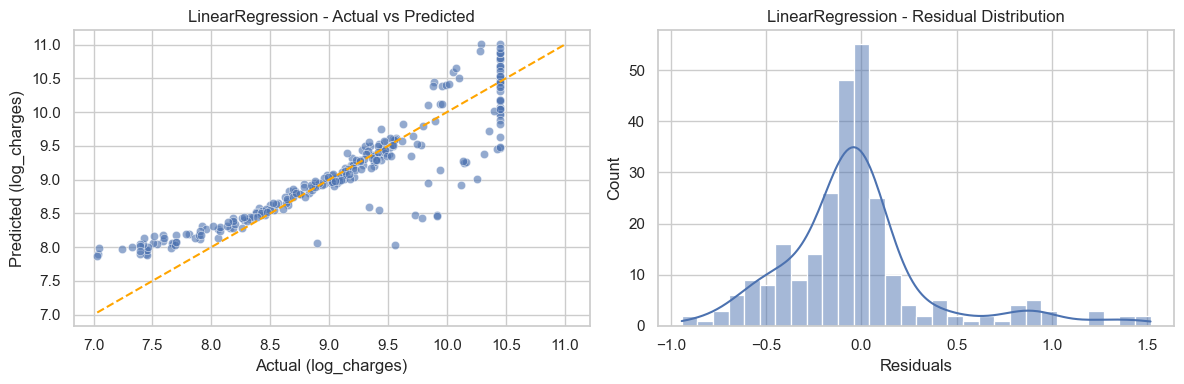


Plotting: Ridge


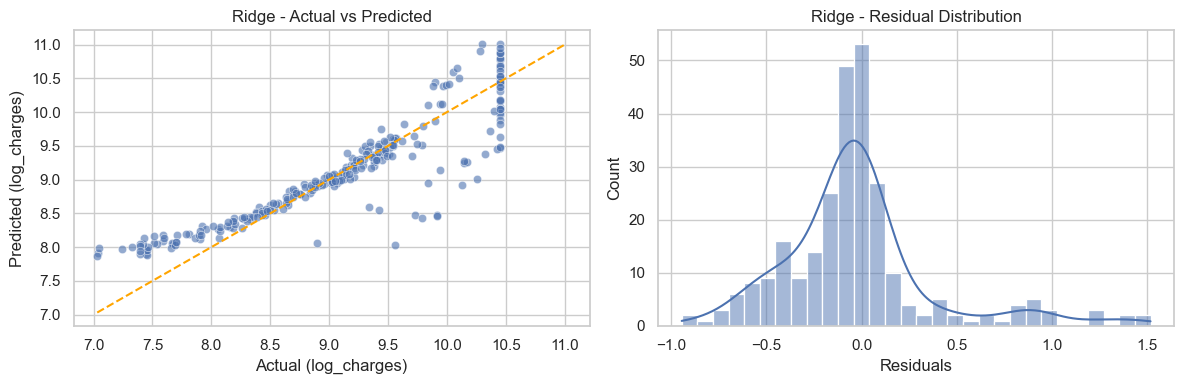


Plotting: Lasso


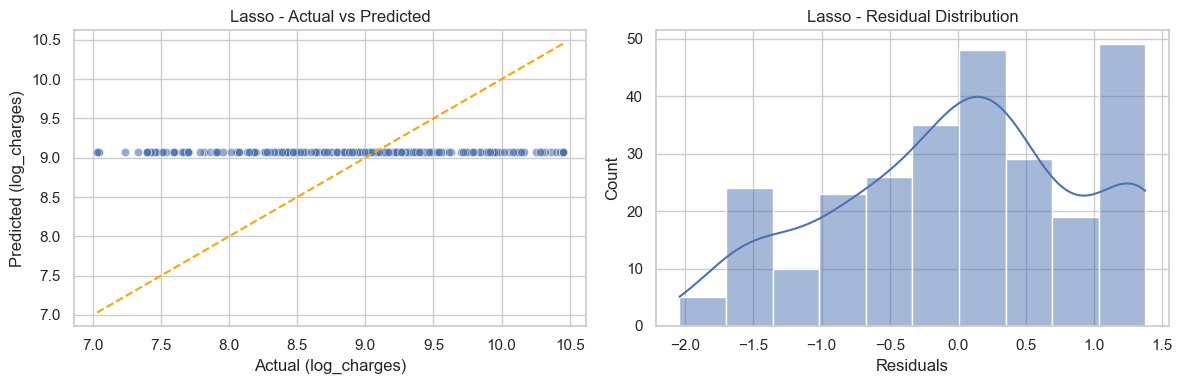


Plotting: ElasticNet


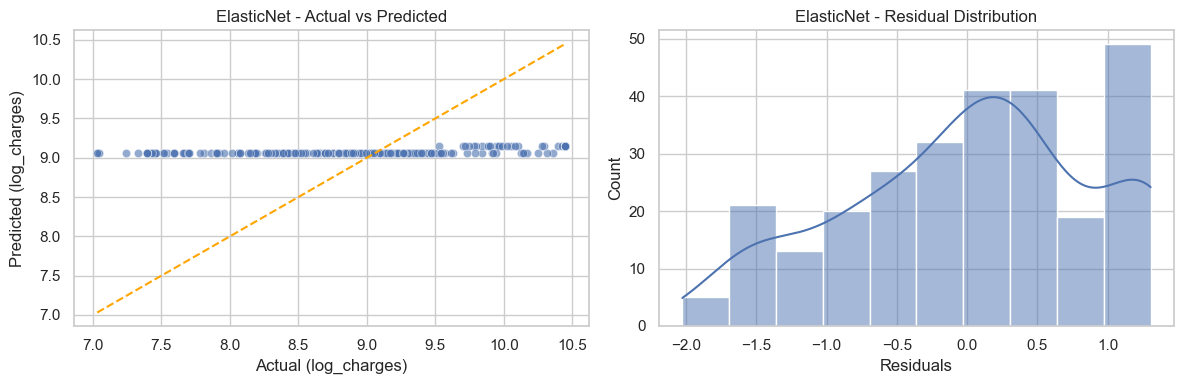


Plotting: DecisionTree


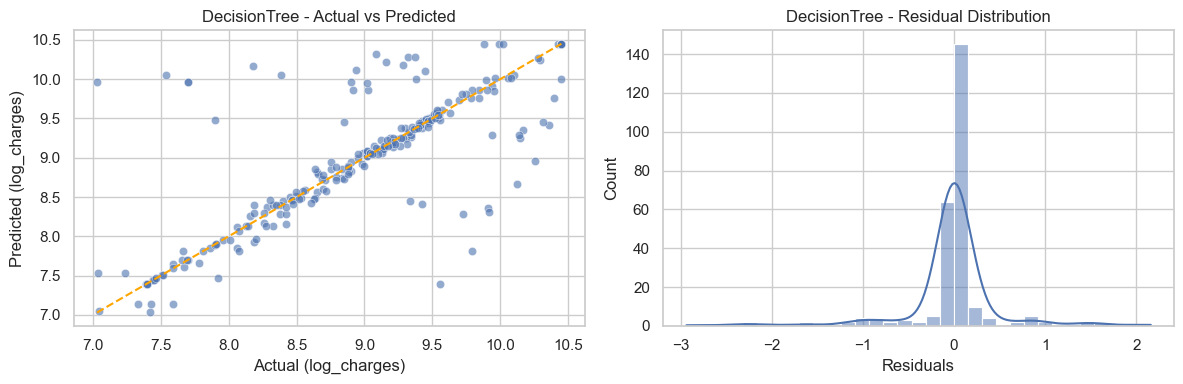


Plotting: RandomForest


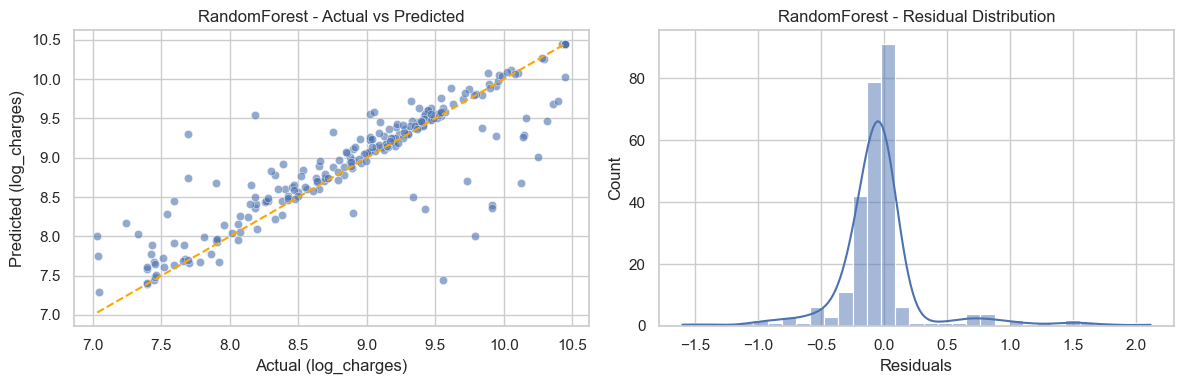


Plotting: GradientBoosting


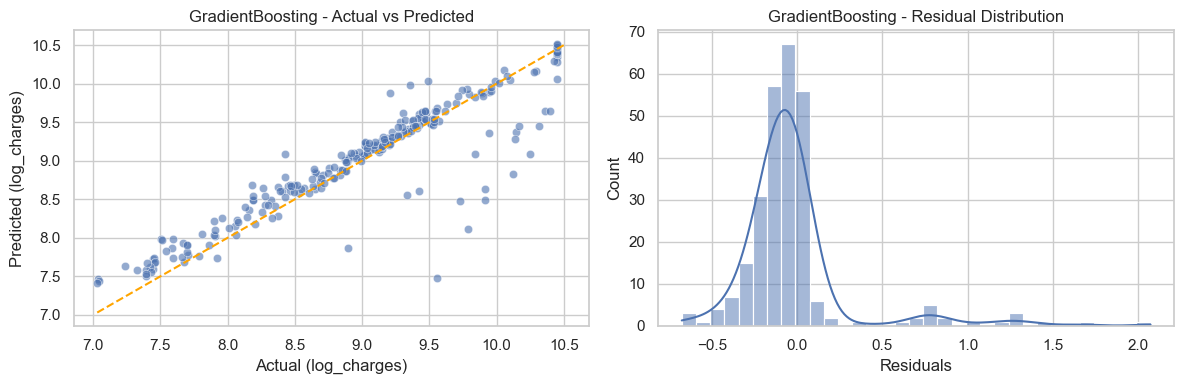


Plotting: XGBoost


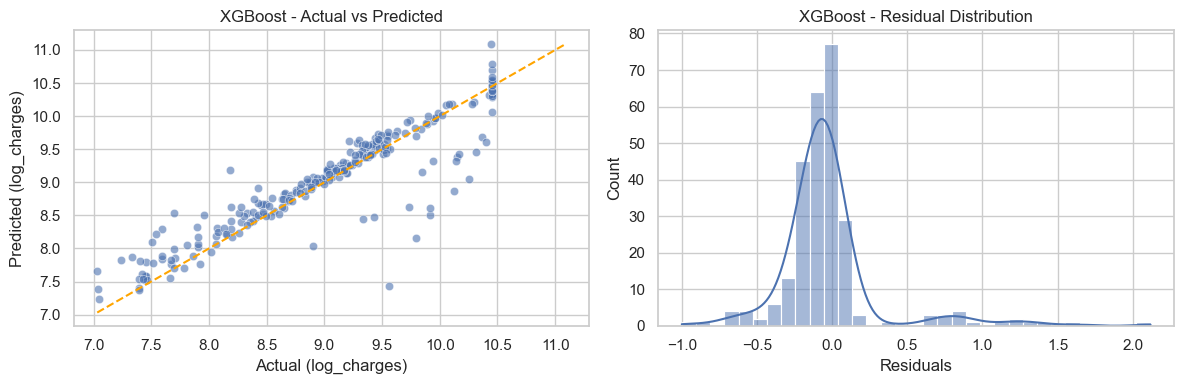

In [46]:
# Actual vs Predicted + Residuals

sns.set(style="whitegrid")

def plot_model_simple(name, model, X_test, y_test):
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Residuals
    residuals = y_test - y_pred
    
    # 1) Actual vs Predicted
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

    # diagonal perfect line
    mn = min(min(y_test), min(y_pred))
    mx = max(max(y_test), max(y_pred))
    plt.plot([mn, mx], [mn, mx], '--', color='orange')

    plt.xlabel("Actual (log_charges)")
    plt.ylabel("Predicted (log_charges)")
    plt.title(f"{name} - Actual vs Predicted")

    # 2) Residuals plot
    plt.subplot(1,2,2)
    sns.histplot(residuals, kde=True)

    plt.xlabel("Residuals")
    plt.title(f"{name} - Residual Distribution")

    plt.tight_layout()
    plt.show()


# LOOP THROUGH ALL MODELS AND PLOT
for name, model in models.items():
    print(f"\nPlotting: {name}")
    plot_model_simple(name, model, X_test, y_test)


## MODEL COMPARISON PLOTS

,Model,MAE,MSE,RMSE,R2,Adjusted_R2
0,GradientBoosting,0.187948,0.111566,0.334016,0.867068,0.862962
1,XGBoost,0.195527,0.119458,0.345627,0.857665,0.853269
2,RandomForest,0.196093,0.147477,0.384027,0.824281,0.818853
3,LinearRegression,0.263272,0.160281,0.400351,0.809024,0.803126
4,Ridge,0.263421,0.160340,0.400424,0.808954,0.803053
5,DecisionTree,0.227145,0.279320,0.528507,0.667189,0.656909
6,ElasticNet,0.729640,0.794769,0.891498,0.053029,0.023779
7,Lasso,0.747971,0.840099,0.916569,-0.000983,-0.031901


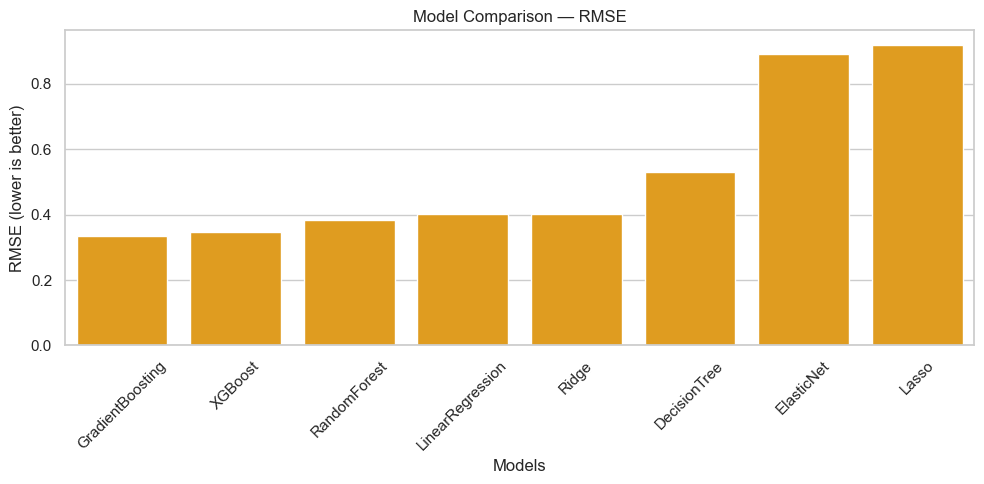

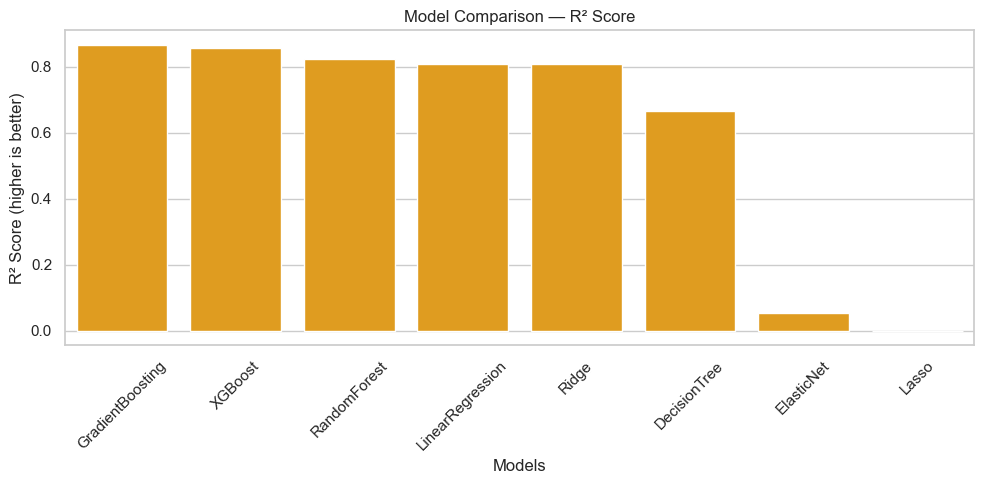

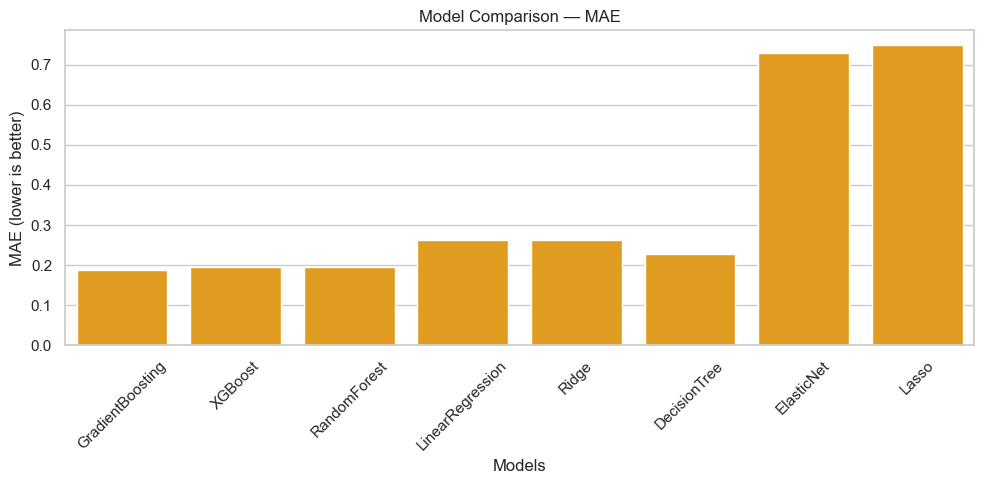

 BEST MODEL (Based on RMSE) 
Model          GradientBoosting
MAE                    0.187948
MSE                    0.111566
RMSE                   0.334016
R2                     0.867068
Adjusted_R2            0.862962
Name: 0, dtype: object


In [ ]:
sns.set(style="whitegrid", palette="deep")

display(results_df)

# 1) RMSE Comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x="Model", y="RMSE", color='orange')
plt.xticks(rotation=45)
plt.title("Model Comparison — RMSE")
plt.ylabel("RMSE (lower is better)")
plt.xlabel("Models")
plt.tight_layout()
plt.show()

# 2) R² Score Comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x="Model", y="R2", color='orange')
plt.xticks(rotation=45)
plt.title("Model Comparison — R² Score")
plt.ylabel("R² Score (higher is better)")
plt.xlabel("Models")
plt.tight_layout()
plt.show()

# 3) MAE Comparison (optional, but useful)
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x="Model", y="MAE", color='orange')
plt.xticks(rotation=45)
plt.title("Model Comparison — MAE")
plt.ylabel("MAE (lower is better)")
plt.xlabel("Models")
plt.tight_layout()
plt.show()

# 4) Print BEST model by RMSE
best_model_row = results_df.loc[results_df['RMSE'].idxmin()]
print(" BEST MODEL (Based on RMSE) ")
print(best_model_row)

# STEP 8: Hyperparameter Tuning

In [48]:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False
    print("XGBoost not installed. Skipping XGB tuning.")

In [49]:
# RANDOMIZED SEARCH — GradientBoosting

print("\nTuning GradientBoostingRegressor using RandomizedSearchCV.")

gbr = GradientBoostingRegressor(random_state=42)

# Small, simple parameter search space
gbr_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4]
}

gbr_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=gbr_params,
    n_iter=5,     # tries 5 random combinations
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

gbr_search.fit(X_train, y_train)

print("Best Params (GBR):", gbr_search.best_params_)

best_gbr = gbr_search.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)
metrics_gbr = evaluate_model(y_test, y_pred_gbr, X_test)



Tuning GradientBoostingRegressor using RandomizedSearchCV.
Best Params (GBR): {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
# RANDOMIZED SEARCH — XGBoost 

if xgb_available:
    print("\nTuning XGBoost using RandomizedSearchCV.")

    xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

    xgb_params = {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 5]
    }

    xgb_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=xgb_params,
        n_iter=5,
        cv=3,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        random_state=42
    )

    xgb_search.fit(X_train, y_train)

    print("Best Params (XGB):", xgb_search.best_params_)

    best_xgb = xgb_search.best_estimator_
    y_pred_xgb = best_xgb.predict(X_test)
    metrics_xgb = evaluate_model(y_test, y_pred_xgb, X_test)



Tuning XGBoost using RandomizedSearchCV.
Best Params (XGB): {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05}


In [ ]:
# GRID SEARCH — Ridge Regression 

print("\nTuning Ridge Regression using GridSearchCV.")

ridge = Ridge()

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10]   
}

ridge_search = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_params,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

ridge_search.fit(X_train, y_train)

print("Best Params (Ridge):", ridge_search.best_params_)

best_ridge = ridge_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
metrics_ridge = evaluate_model(y_test, y_pred_ridge, X_test)


Tuning Ridge Regression using GridSearchCV.
Best Params (Ridge): {'alpha': 0.01}


In [52]:
# SUMMARY TABLE

summary = []

summary.append({
    "Model": "GradientBoosting_Tuned",
    "Best_Params": gbr_search.best_params_,
    "MAE/MSE/RMSE/R2/AdjR2": metrics_gbr
})

if xgb_available:
    summary.append({
        "Model": "XGBoost_Tuned",
        "Best_Params": xgb_search.best_params_,
        "MAE/MSE/RMSE/R2/AdjR2": metrics_xgb
    })

summary.append({
    "Model": "Ridge_Tuned",
    "Best_Params": ridge_search.best_params_,
    "MAE/MSE/RMSE/R2/AdjR2": metrics_ridge
})

summary_df = pd.DataFrame(summary)
display(summary_df)



,Model,Best_Params,MAE/MSE/RMSE/R2/AdjR2
0,GradientBoosting_Tuned,"{'n_estimators': 50, 'max_depth': 3, 'learning...","(0.17927171929462232, 0.10609381954857704, 0.3..."
1,XGBoost_Tuned,"{'n_estimators': 100, 'max_depth': 4, 'learnin...","(0.17411464747555144, 0.10688744104270938, 0.3..."
2,Ridge_Tuned,{'alpha': 0.01},"(0.2632733066109175, 0.16028153155229435, 0.40..."


# STEP 9: FINAL MODEL TRAINING & SAVE

In [53]:
# 1) Prepare full dataset (X_full, y_full)
features = ['age', 'sex', 'bmi', 'children', 'smoker',
            'region_northwest', 'region_southeast', 'region_southwest']

X_full = df[features]
y_full = df['log_charges']

# 2) Re-fit scaler on the full dataset
final_scaler = StandardScaler()
X_full_scaled = final_scaler.fit_transform(X_full)

# 3) Select the BEST MODEL 
# (GradientBoosting was the winner)
best_model = best_gbr   # using tuned model

# Train the model on the FULL scaled dataset
best_model.fit(X_full_scaled, y_full)

# 4) SAVE the model and scaler using PICKLE

# Save model
with open("final_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save scaler
with open("final_scaler.pkl", "wb") as f:
    pickle.dump(final_scaler, f)

print("Final model and scaler saved successfully using PICKLE!")


Final model and scaler saved successfully using PICKLE!


In [54]:
# Load model
with open("final_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load scaler
with open("final_scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# EXAMPLE PREDICTION (one user input)

new_user = {
    "age": 18,
    "sex": 1,              # 0=female, 1=male
    "bmi": 33.77,
    "children": 1,
    "smoker": 0,           # 0=no, 1=yes
    "region_northwest": 0,
    "region_southeast": 1,
    "region_southwest": 0
}

new_df = pd.DataFrame([new_user])[features]

# scale new data
new_scaled = loaded_scaler.transform(new_df)

# predict log_charges
pred_log = loaded_model.predict(new_scaled)[0]

# convert log → actual charges
predicted_charges = np.exp(pred_log)

print("Predicted Charges:", round(predicted_charges, 2))


Predicted Charges: 2347.86
